In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

In [2]:
# pca lib

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [3]:
# importing Clustering Lib

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as sch

from sklearn.metrics import silhouette_score as sil

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
wine = pd.read_csv('wine.csv')

In [6]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
wine[wine.duplicated()].shape

(0, 14)

In [9]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

In [10]:
# considering only Numerical Data

wine_data = wine.iloc[:,1:]

wine_scale = scale(wine_data.values)

## PCA

In [11]:
pca = PCA()

pca_model = pca.fit_transform(wine_scale)

In [12]:
# The amount of variance that each PCA explains is  -- old features(x) =13 , new features(z) =  13

variance = pca.explained_variance_ratio_
variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [13]:
var = np.round(variance,4)*100
var

array([36.2 , 19.21, 11.12,  7.07,  6.56,  4.94,  4.24,  2.68,  2.22,
        1.93,  1.74,  1.3 ,  0.8 ])

<BarContainer object of 13 artists>

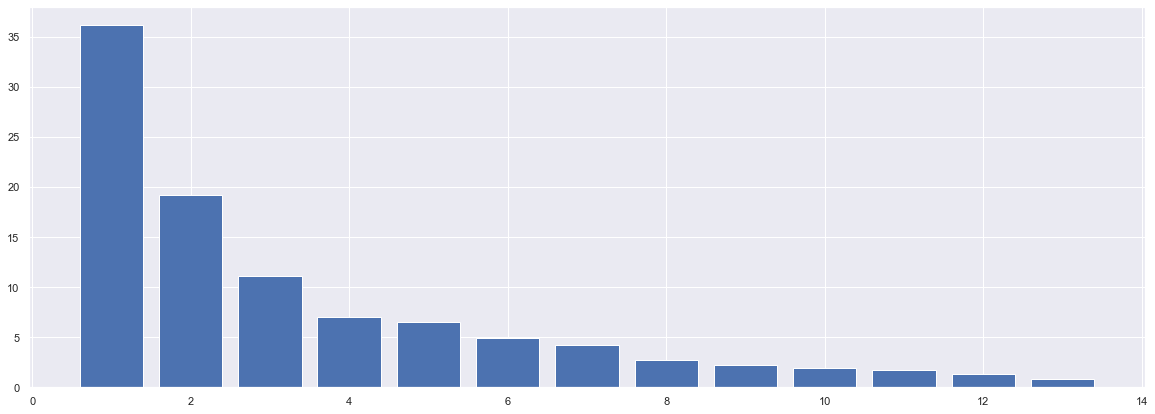

In [14]:
plt.figure(figsize=(20,7))
plt.bar(range(1,len(var)+1),var)

In [15]:
np.cumsum(var)

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

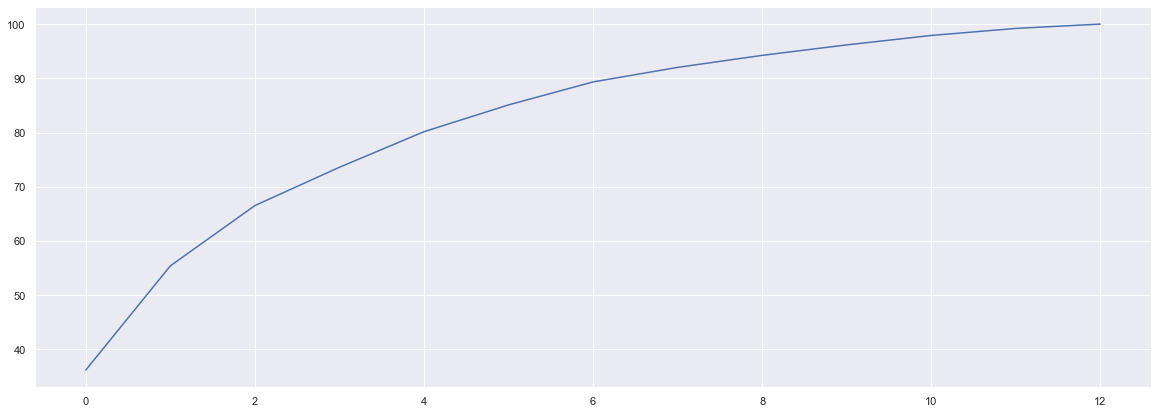

In [16]:
# Variance plot for PCA components obtained 
plt.figure(figsize=(20,7))
plt.plot(np.cumsum(var))

In [17]:
# components of pca

pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [18]:
pca_model

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
pca_model.shape

(178, 13)

In [20]:
# converting to DataFrame

wine_df1 = pd.DataFrame(pca_model,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])

In [21]:
wine_df = pd.concat([wine.iloc[:,0],wine_df1],axis=1)

In [22]:
wine_df.head()

,Type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13
0,1,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239
1,1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637
2,1,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717
3,1,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364


Text(0, 0.5, 'PCA2')

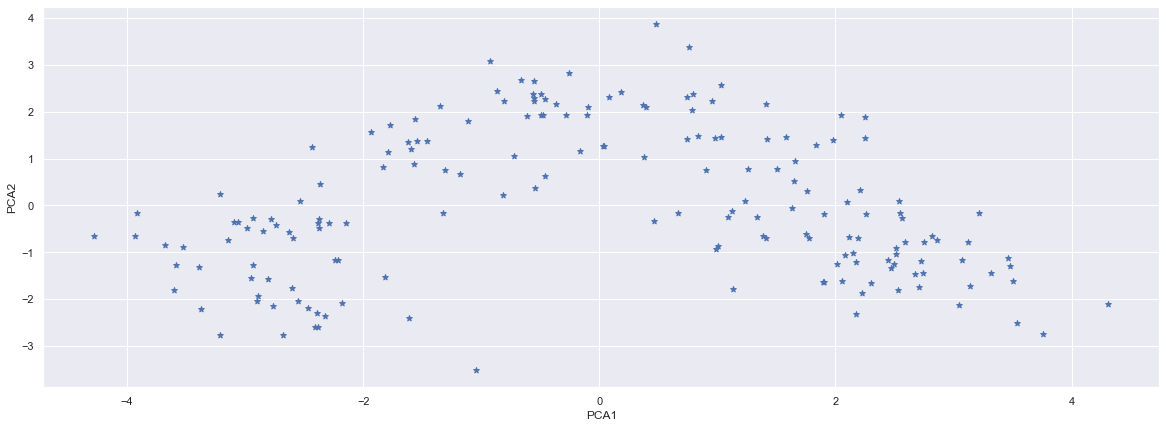

In [23]:
# z1,z2 are independent of each other 
# plot between PCA1 and PCA2 

plt.figure(figsize=(20,7))
plt.scatter(wine_df['PCA1'],wine_df['PCA2'],marker='*')

plt.xlabel('PCA1')
plt.ylabel('PCA2')

Text(0, 0.5, 'PCA2')

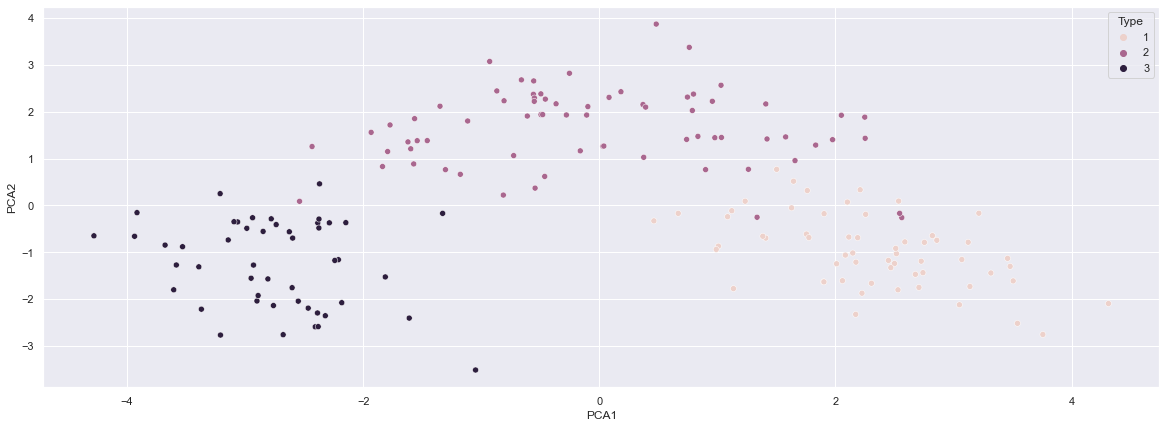

In [24]:
# z1,z2 are independent of each other 
# plot between PCA1 and PCA2 

plt.figure(figsize=(20,7))
sns.scatterplot('PCA1','PCA2',data = wine_df,hue='Type')

plt.xlabel('PCA1')
plt.ylabel('PCA2')

## Clustering on PCA

In [25]:
wine_pca = wine_df.iloc[:,1:4]

In [26]:
# normalizing the 
array = normalize(wine_pca)

normal_wine = pd.DataFrame(array,columns=wine_pca.columns)

In [27]:
normal_wine.head()

,PCA1,PCA2,PCA3
0,0.915968,-0.398633,-0.045771
1,0.732454,0.110522,-0.671786
2,0.870267,-0.356563,0.339850
3,0.805707,-0.591107,-0.037785
4,0.415997,-0.358652,0.835652


### Hierarchical Clustering 

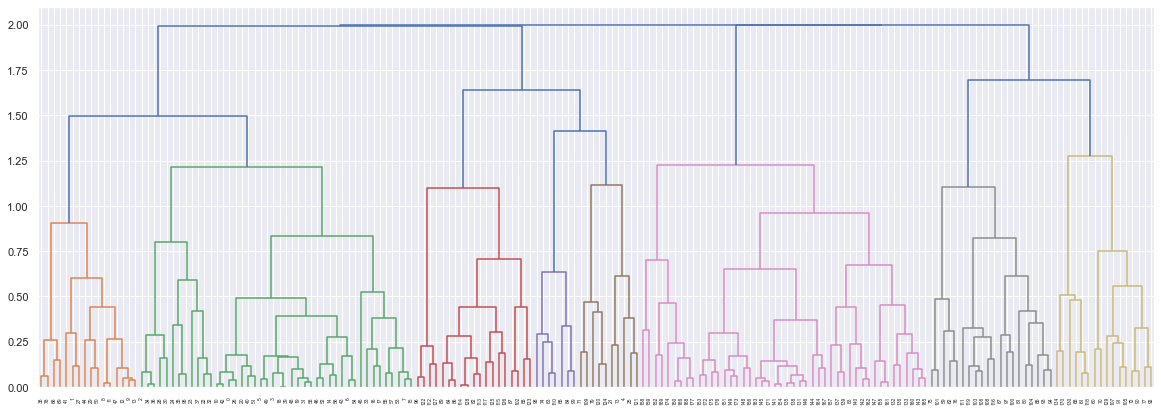

In [28]:
# dendrogram

plt.figure(figsize=(20,7))
dendrogram_complete = sch.dendrogram(sch.linkage(normal_wine,method='complete'))

In [29]:
# optimal no of cluster

sil_score = []

for i in range(2,11):
    
    hc = AgglomerativeClustering(n_clusters=i,linkage='complete',affinity='euclidean')
    clusters=hc.fit_predict(normal_wine)
    sil_score.append(sil(normal_wine,clusters))

Text(0.5, 1.0, 'Optimal no clusters by SIL ')

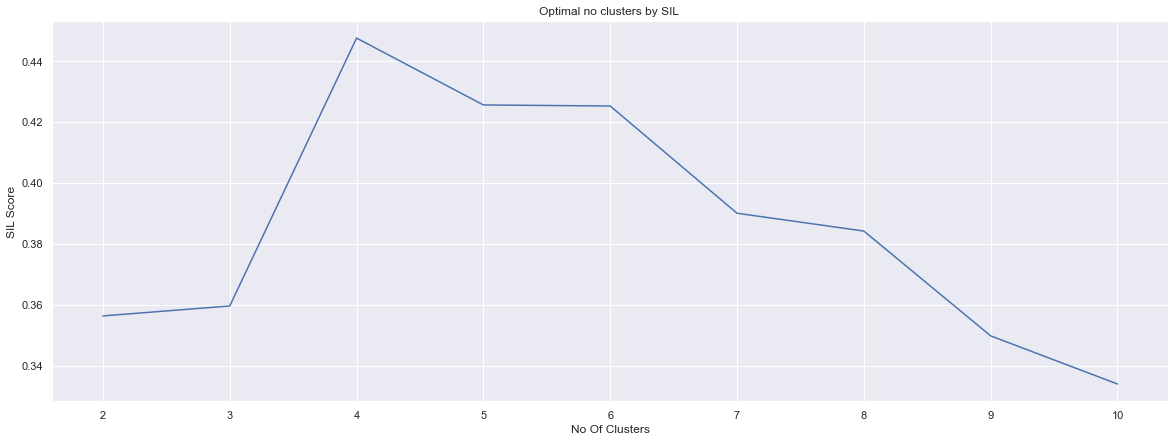

In [30]:
plt.figure(figsize=(20,7))

plt.plot(range(2,11),sil_score)

plt.xlabel('No Of Clusters')
plt.ylabel('SIL Score')
plt.title('Optimal no clusters by SIL ')

In [ ]:
# optimal no of clusters = 4 (max SIL Score)

In [31]:
# Creating Clusters

hc = AgglomerativeClustering(n_clusters=4,linkage='complete',affinity='euclidean')
clusters=hc.fit_predict(normal_wine)

In [32]:
clusters

array([3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 1, 1, 1,
       3, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 1, 2, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 3, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

In [33]:
# creating copy
wine_p = wine_df

In [34]:
wine_p['Cluster'] =clusters
wine_p.head()

,Type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,Cluster
0,1,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,3
1,1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,3
2,1,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,3
3,1,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,3
4,1,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1


In [35]:
wine_p['Cluster'].value_counts()

3    60
2    46
0    36
1    36
Name: Cluster, dtype: int64

### KMeans Clustering

In [36]:
inertia = []

for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit_predict(normal_wine)
    inertia.append(km.inertia_)

Text(0.5, 1.0, 'Optimal no clusters by Inertia / Elbow ')

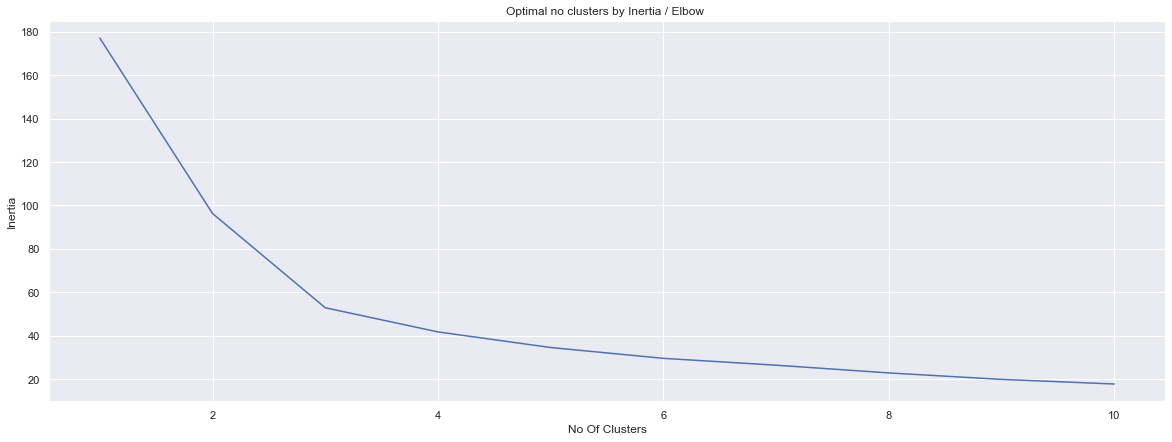

In [37]:
plt.figure(figsize=(20,7))

plt.plot(range(1,11),inertia)

plt.xlabel('No Of Clusters')
plt.ylabel('Inertia')
plt.title('Optimal no clusters by Inertia / Elbow ')

In [ ]:
# optimal no of clusters = 4 (slope after 4 almost linear)

In [38]:
km =KMeans(n_clusters=4)
clusters_km = km.fit_predict(normal_wine)

In [39]:
# creating copy
wine_km = wine_df

In [40]:
wine_km['Cluster'] =clusters_km
wine_km.head()

,Type,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12,PCA13,Cluster
0,1,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1
1,1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,1
2,1,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1
3,1,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1
4,1,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1


In [41]:
wine_km['Cluster'].value_counts()

1    59
2    54
0    35
3    30
Name: Cluster, dtype: int64

## Clustering on Original Data 

In [42]:
# original data - wine, wine_data
# normalize

wine_org = pd.DataFrame(normalize(wine_data),columns=wine_data.columns)
wine_org.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


### Hierarchical Clustering 

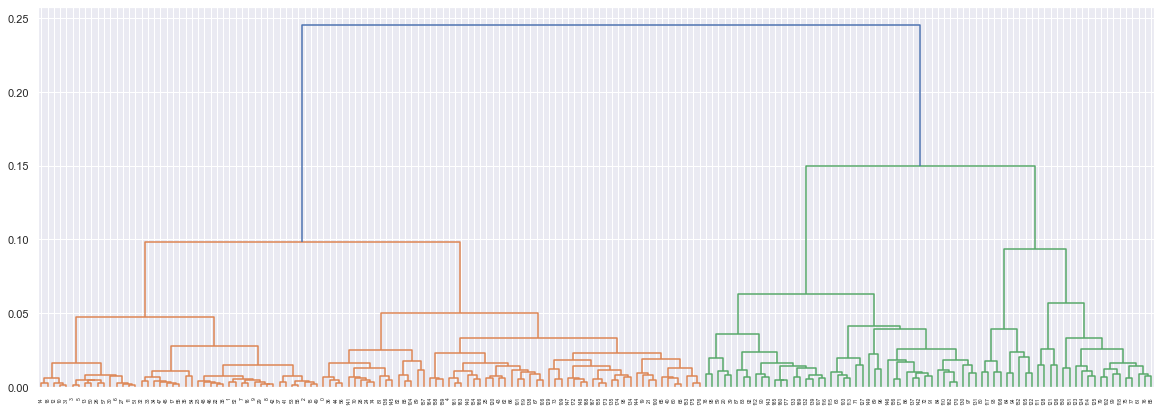

In [43]:
# dendrogram

plt.figure(figsize=(20,7))
dendrogram_complete = sch.dendrogram(sch.linkage(wine_org,method='complete'))

In [44]:
# Optimal No of Clusters by SIL

sil_score = []

for i in range(2,11):
    
    hc = AgglomerativeClustering(n_clusters=i,linkage='complete',affinity='euclidean')
    clusters=hc.fit_predict(wine_org)
    sil_score.append(sil(wine_org,clusters))


Text(0.5, 1.0, 'Optimal no clusters by SIL ')

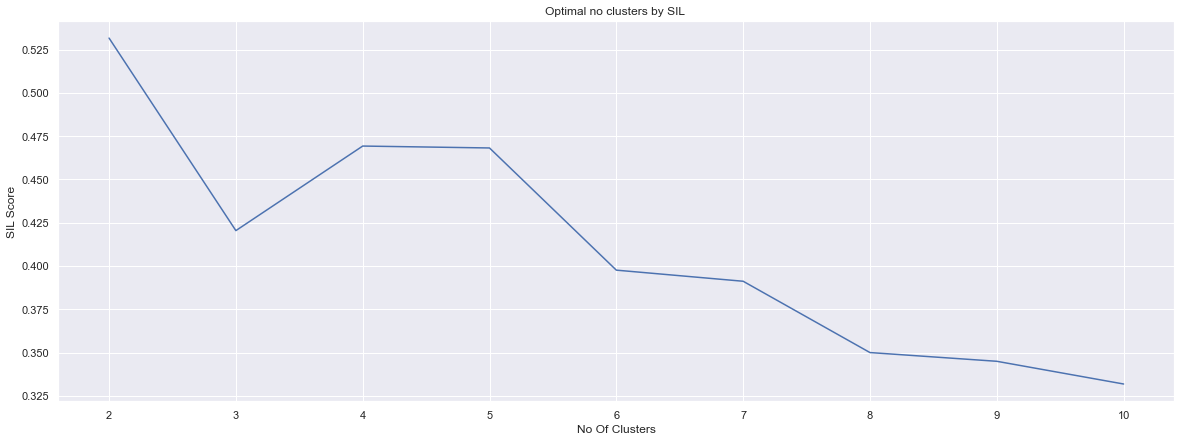

In [45]:
plt.figure(figsize=(20,7))

plt.plot(range(2,11),sil_score)

plt.xlabel('No Of Clusters')
plt.ylabel('SIL Score')
plt.title('Optimal no clusters by SIL ')

In [ ]:
# optimal no of clusters by SIL = 2 (max SIL Score)

In [46]:
# creating cluster 

hc = AgglomerativeClustering(n_clusters=2,linkage='complete',affinity='euclidean')
clusters_org=hc.fit_predict(wine_org)

In [47]:
wine_hc_org = wine

wine_hc_org['Cluster'] = clusters_org

wine_hc_org.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [48]:
wine_hc_org['Cluster'].value_counts()

1    106
0     72
Name: Cluster, dtype: int64

### KMeans Clustering

In [49]:
inertia = []

for i in range(1,11):
    km =KMeans(n_clusters=i)
    km.fit_predict(wine_org)
    inertia.append(km.inertia_)

Text(0.5, 1.0, 'Optimal no clusters by Inertia / Elbow ')

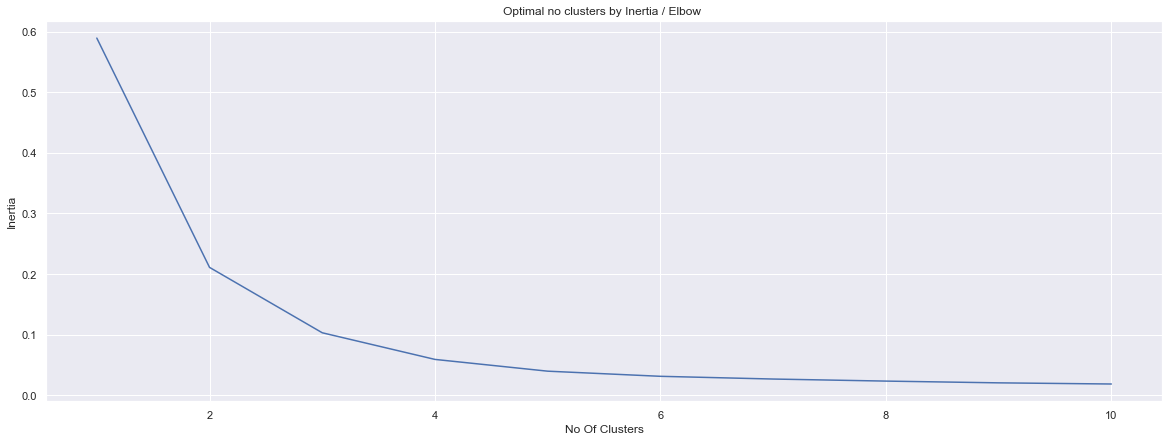

In [50]:
plt.figure(figsize=(20,7))

plt.plot(range(1,11),inertia)

plt.xlabel('No Of Clusters')
plt.ylabel('Inertia')
plt.title('Optimal no clusters by Inertia / Elbow ')

In [51]:
# creating cluster 

km =KMeans(n_clusters=4)
cluster_km_org = km.fit_predict(wine_org)

In [52]:
# creating copy

wine_km_org = wine

wine_km_org['Cluster'] = cluster_km_org

wine_km_org.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [53]:
wine_km_org['Cluster'].value_counts()

0    66
2    53
1    45
3    14
Name: Cluster, dtype: int64